# Attribute Information:
### - Age: age of the patient 
    - [years]
    
### - Sex: sex of the patient 
    - M: Male
    - F: Female
    
### - ChestPainType: chest pain type 
    - TA: Typical Angina
    - ATA: Atypical Angina
    - NAP: Non-Anginal Pain
    - ASY: Asymptomatic

### - RestingBP: resting blood pressure
    - [mm Hg]
    
### - Cholesterol: serum cholesterol 
    - [mm/dl]
    
### - FastingBS: fasting blood sugar 
    - 1: if FastingBS > 120 mg/dl
    - 0: otherwise
    
### - RestingECG: resting electrocardiogram results 
    - Normal: Normal
    - ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

### - MaxHR: maximum heart rate achieved 
    - [Numeric value between 60 and 202]
                                                
### - ExerciseAngina: exercise-induced angina
    - Y: Yes
    - N: No
                                                
### - Oldpeak: oldpeak = ST 
    - [Numeric value measured in depression]
                                                
### - ST_Slope: the slope of the peak exercise ST segment 
    - Up: upsloping
    - Flat: flat
    - Down: downsloping
                                                
### - HeartDisease: output class 
    - 1: heart disease
    - 0: Normal

In [70]:
# ALL libraries used in this project

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [11]:
# Let us see what data we have for the dataset

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
# See the # of attributes of each category

df.apply(lambda x: len(x.unique()))

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [25]:
# transform categorical variables features to numeric

le = LabelEncoder()

# Get all Categorical Variables
cat_list = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Fit and Transform them to numeric categorical variables
for col in cat_list:
    df[col] = le.fit_transform(df[col])
    
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


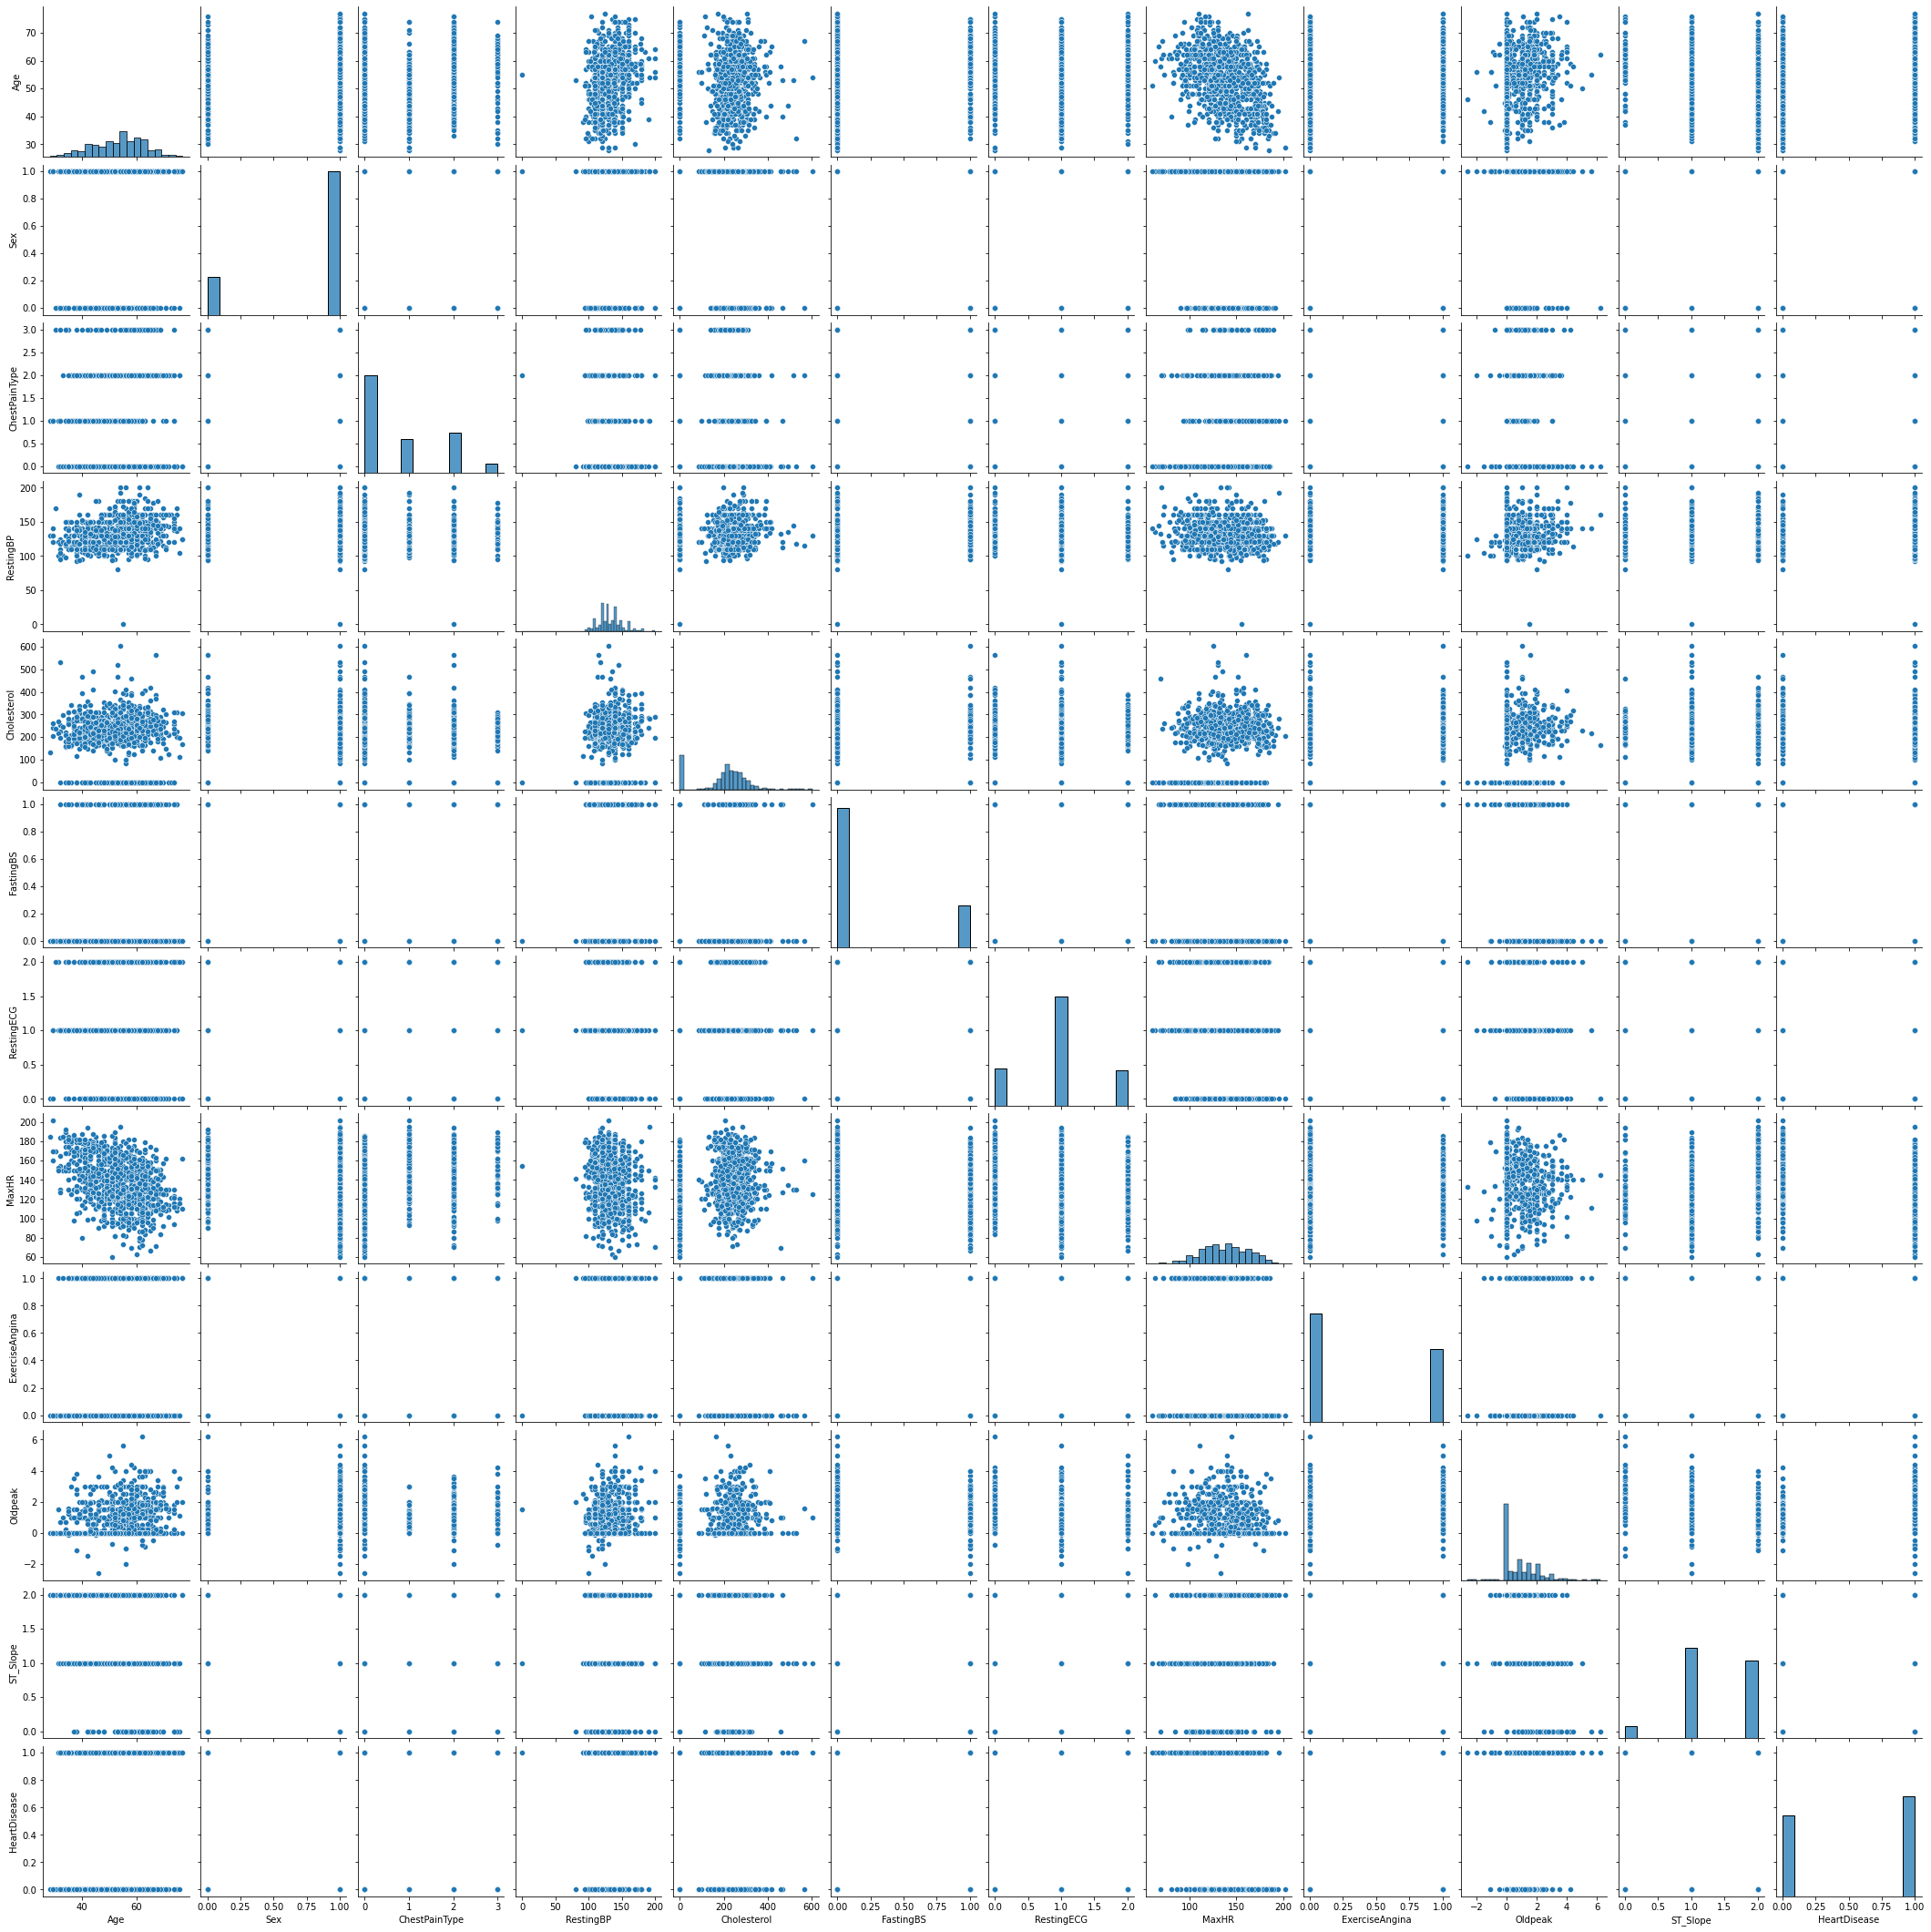

In [29]:
# Visualising data

sns.pairplot(df)

In [30]:
# It seems as tho there is not much correlation between pairs except for MaxHR and Age. As age increases, MaxHR decreases. 
# Since there are no significant correlations between variables, we do not need to remove any variables.

In [21]:
# Now that we have all numeric values whether they be categorical or numerical, 
# we can now split to train and test data and run the random forest algo

X_train, X_test, y_train, y_test = train_test_split(df.drop("HeartDisease", axis=1), df["HeartDisease"], test_size=0.2, random_state=0)

In [80]:
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [81]:
model.score(X_test, y_test)

0.8641304347826086

In [82]:
# Plotting confusion matrix to see distribution of errors 
# and where model perform well vs where model perform bad

In [83]:
y_pred = model.predict(X_test)

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[63, 14],
       [11, 96]])

Text(69.0, 0.5, 'Truth')

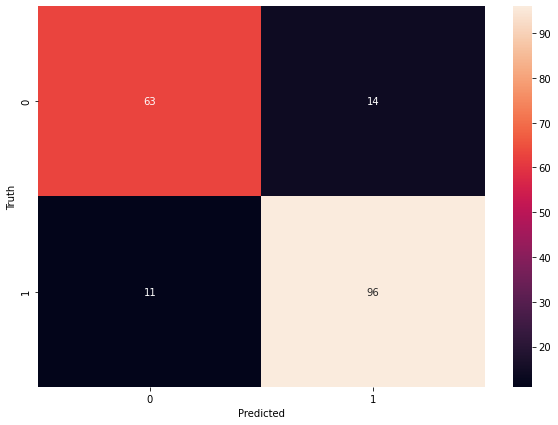

In [85]:
%matplotlib inline

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [73]:
# Based on the chart, we see that the model had 
# -14 false positives
# -11 false negatives
# with an accuracy rate of about 86%